# Advertising Mix Modeling Through Sales Data Analysis
## Mix optimization using advertising costs and sales data
----
##### by Brenda Hali


## Problem Statement

Every firm is different. Even those within the same market segments can execute different advertising strategies. Finding an advertising mix that works for your firm is equal parts science and art. 

Firms that run successful campaigns across multiple platforms have mastered the arts of combining these tactics to create loyal customers that can’t wait to purchase your product or service offering.

Finding the right mix, however, is where many firms struggle. With nearly unlimited options, it’s often hard to drill down the correct platform, strategy, or tactic that will lead you sales. Most firms never find the right mix at all. 
This notebook will cover the basis to master the science of finding and optimizing the advertising mix. 

## Goal
-	Predict the impact of media spends on sales 
-	Find the right advertising mix that maximizes sales
-	Use this media mix in other marketing plans 


Note: When firms are in Acquisition stage, the variables will be indicators such as number of visitors, number of subscribers, daily / monthly active users, rather than sales.



### Data

Download the public dataset from Kaggle (https://www.kaggle.com/sazid28/advertising.csv/).


#### Data Description


  * **TV** - TV Cost
  * **Radio** - Radio Cost
  * **Newspaper** - Newspaper Cost 
  * **Sales** - Total Sales



## Exploratory Data Analysis

In [1]:
# Data manipulation libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request, json
import requests

# Modeling Libraries

import statsmodels.formula.api as sm
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading and exploring data
url = 'https://drive.google.com/file/d/15314tJ8J1orLRF-k3r8xCntaYOgH1HYK/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Looking for missing data, and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# Dropping values that are not necesarry for this analysis

df = df[['TV', 'radio', 'newspaper', 'sales']]
print(df.shape)
df.head()

(200, 4)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# Printing variables' descripting statistics

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


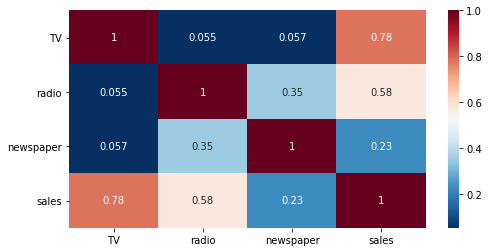

In [6]:
# Looking for correlations in variables

fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(df.corr(),annot=True, cmap='RdBu_r');

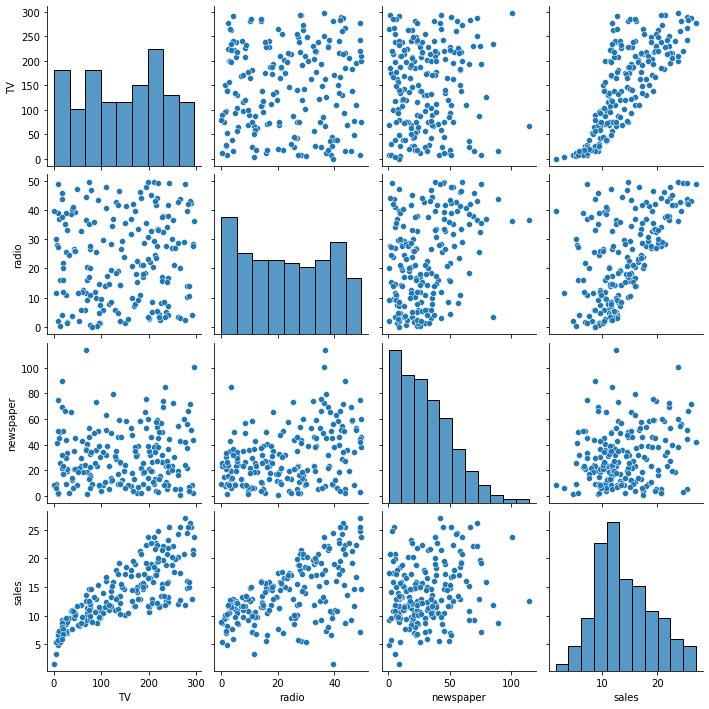

In [7]:
# Ploting the data distribution to graphycally identify correlations, patterns and outliers

sns.pairplot(df[['TV', 'radio', 'newspaper', 'sales']])
plt.show()

In [8]:
# Selecting dependent and independent variables.  We want to to predict Sales represented by X, and features represented by Y the advertising channels 

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [9]:
print(X.shape, y.shape)

(200, 3) (200,)


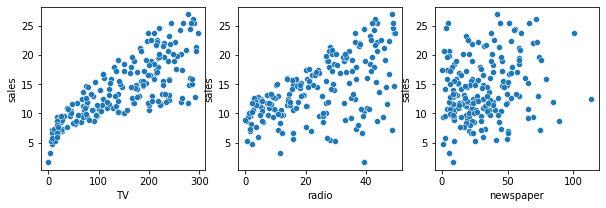

In [10]:
#Correlations - extended
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3) #This line place the visualizations in one screen

figure.set_size_inches(10, 3) # Size

# Visualize the distribution of media relation to sales with a scatterplot 
sns.scatterplot(data=df, x='TV', y='sales', ax=ax1)
sns.scatterplot(data=df, x='radio', y='sales', ax=ax2)
sns.scatterplot(data=df, x='newspaper', y='sales', ax=ax3)



Analyzing the scatterplots, we can clearly see TV advertising has the higher an impact on sales.

## Lineal Regression Analysis

#### Using statsmodels library

In [11]:
# Analysis using statsmodels library

model = sm.ols(formula = 'sales ~ TV + radio + newspaper', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        04:33:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

#### Model Interpretation

-	##### R-Squared: 

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination. R squared values are always between 0 and 1, when 0 indicates that the model does not explain the model variability, and 1 explains all the variability. 
In this model R-squared is 0.897, significantly high. 

-	##### P-value

The level of statistical significance is often expressed as a p-value, which is a number between 0 and 1. Generally, when a p-value less than 0.05 (≤ 0.05) is statistically significant.

In our model summary, the p-values are shown under the column labeled P>|t|. 

TV and radio the p-values are 0.0 or ≤ 0.05. Those variables are statistically significant.
Newspaper is statistically insignificant, with a p-value of 0.86.  Newspaper advertisements have not effect on sales .


The model’s regression equation can be seen in the column coef, being as follows: 

##### sales = 2.9389 + 0.0458 TV + 0.1885 radio-0.001*newspaper


### Regression using sklearn

In [12]:
model = LinearRegression().fit(X, y)
print(model.intercept_, model.coef_)


2.938889369459412 [ 0.04576465  0.18853002 -0.00103749]


#### OLS results depending on whether or not variables are included

In [13]:

model_1 = sm.ols(formula = 'sales ~ TV + radio + newspaper', data=df).fit()
model_2 = sm.ols(formula = 'sales ~ TV + radio', data=df).fit()
model_3 = sm.ols(formula = 'sales ~ TV', data=df).fit()

print(model_1.summary())
print('--------------------------------')
print(model_2.summary())
print('--------------------------------')
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        04:33:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

### Interpretation

Ordinary Least Squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable in the given dataset and those predicted by the linear function of the independent variable.

There are three statistical approaches to estimating how well a given model fits a dataset and how complex the model is. And each can be shown to be equivalent or proportional to each other, although each was derived from a different framing or field of study.

They are:
* Akaike Information Criterion (AIC). Derived from frequentist probability.
* Bayesian Information Criterion (BIC). Derived from Bayesian probability.
* Minimum Description Length (MDL). Derived from information theory.

### Using AIC and BIC

-	AIC and BIC of model_2 with the insignificant variable newspaper removed are the lowest. When choosing among multiple models, it is common to select the one where AIC and BIC are the lowest, indicating that it is the best performing model. Of course, AIC and BIC are not the only criteria for selection and should be considered along with other indicators such as RMSE and CFI.

-	According to the results, the p-value was 0.05 or more, and newspaper advertisements did not show a statistically significant difference in the presence or absence of a variable in sales forecasting.  In other words, we can interpret again that newspaper advertisement does not affect sales. 

####  Predicting sales by advertising spending using model_1
##### Regression: sales = 2.9389 + 0.0458 TV + 0.1885 radio-0.001*newspaper

In [14]:
#Spending: TV $300, Radio $10, Newspaper $4
model_1.predict({"TV" : 300, "radio": 10, "newspaper": 4})

0    18.549433
dtype: float64

In [15]:
sales = 2.9389 + 0.0458*300 + 0.1885*10 - 0.001*4
sales

18.5599

### Action Plan

Given that the data has shown that newspaper advertisement investment does not impact sales, the budget of newspaper advertisement can be reallocated to TV or Radio.

-------

### Final thoughts 

This exercise is oversimplified, we worked with less than 200 datapoints and just 3 variables. In real life data you may find multiple variables composing the marketing funnel that impact sales, and time and location should be considered. 

Always double-check the data sources when you are working with samples. Data must have been randomly selected and must have a normal distribution. 

The data science process gets more complicated as data increases, but most of the projects follow the steps we observed in this project. 